#  SEB collection analysis
Notebook for application of dtime method onto SRB moments

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Load Dataset

In [2]:
path = '../datasets/preprocessed/'
stim = pd.read_hdf(path+'relationalDatabase.h5', 'Events').set_index('index')
stim.drop(labels=['MotiveExpTimeSecs'], axis=1, inplace=True)

stim.head()

,Frame,Time,visible,speed,session_id
index,,,,,
0,0,0.000000,0,0.0,0
1,0,0.000000,0,0.0,0
2,1,0.004167,0,0.0,0
3,2,0.008333,0,0.0,0
4,3,0.012500,0,0.0,0


In [3]:
SRB = pd.read_hdf('SRB.h5', 'Rat_Behavior').set_index('index')
SRB.head(3)

,Frame,Time,X_Pos,Y_Pos,Z_Pos,X_Ori,Y_Ori,Z_Ori,session_id,Filtered,Theta,U,U_var,visible,speed,SRB_id
index,,,,,,,,,,,,,,,,
0,37440,156.000010,0.093441,0.165644,-0.054762,0.879993,0.424692,-0.212234,0,1,103.559478,-9.052831,2.093787,1,-14.0,0
1,37441,156.004177,0.093453,0.165645,-0.054730,0.880194,0.424575,-0.211656,0,1,103.520946,-9.246986,2.068201,1,-14.0,0
2,37442,156.008343,0.093482,0.165663,-0.054691,0.880144,0.424881,-0.211242,0,1,103.496176,-5.945695,2.043517,1,-14.0,0


## Limits for data detection

In [4]:
## TODO: change values
limits=pd.DataFrame({'speed':[ 7, 14,  28, -7  , -14  , -28],
                     'min'  :[ 3,  6,  20, -8.5, -21.5, -34],
                     'max'  :[ 9, 22,  34, -3  , -6   , -20]})
limits

,max,min,speed
0,9,3.0,7
1,22,6.0,14
2,34,20.0,28
3,-3,-8.5,-7
4,-6,-21.5,-14
5,-20,-34.0,-28


### Looking for Stimuli Related Behavior with given limits

In [5]:
rat_svf = SRB.copy()

In [6]:
rat_svf['Dmin'], rat_svf['Dmax'] = 0, 0
rat_svf['change'] = False
for index, row in limits.iterrows():
    rat_svf['change'] = (rat_svf['Dmin']==0) & (rat_svf['speed']==row['speed'])
    rat_svf['Dmin'] = np.where(rat_svf['change']==True, row['min'], rat_svf['Dmin'])
    rat_svf['Dmax'] = np.where(rat_svf['change']==True, row['max'], rat_svf['Dmax'])

rat_svf.head()

,Frame,Time,X_Pos,Y_Pos,Z_Pos,X_Ori,Y_Ori,Z_Ori,session_id,Filtered,Theta,U,U_var,visible,speed,SRB_id,Dmin,Dmax,change
index,,,,,,,,,,,,,,,,,,,
0,37440,156.000010,0.093441,0.165644,-0.054762,0.879993,0.424692,-0.212234,0,1,103.559478,-9.052831,2.093787,1,-14.0,0,-21.5,-6.0,False
1,37441,156.004177,0.093453,0.165645,-0.054730,0.880194,0.424575,-0.211656,0,1,103.520946,-9.246986,2.068201,1,-14.0,0,-21.5,-6.0,False
2,37442,156.008343,0.093482,0.165663,-0.054691,0.880144,0.424881,-0.211242,0,1,103.496176,-5.945695,2.043517,1,-14.0,0,-21.5,-6.0,False
3,37443,156.012510,0.093516,0.165688,-0.054651,0.880004,0.425362,-0.210859,0,1,103.474713,-5.150755,2.037481,1,-14.0,0,-21.5,-6.0,False
4,37444,156.016677,0.093554,0.165714,-0.054609,0.879837,0.425904,-0.210461,0,1,103.452648,-5.295200,2.033607,1,-14.0,0,-21.5,-6.0,False


In [7]:
rat_svf['SRB'] = (rat_svf['U'] > rat_svf['Dmin']) & (rat_svf['U'] < rat_svf['Dmax'])
rat_svf.head()

,Frame,Time,X_Pos,Y_Pos,Z_Pos,X_Ori,Y_Ori,Z_Ori,session_id,Filtered,Theta,U,U_var,visible,speed,SRB_id,Dmin,Dmax,change,SRB
index,,,,,,,,,,,,,,,,,,,,
0,37440,156.000010,0.093441,0.165644,-0.054762,0.879993,0.424692,-0.212234,0,1,103.559478,-9.052831,2.093787,1,-14.0,0,-21.5,-6.0,False,True
1,37441,156.004177,0.093453,0.165645,-0.054730,0.880194,0.424575,-0.211656,0,1,103.520946,-9.246986,2.068201,1,-14.0,0,-21.5,-6.0,False,True
2,37442,156.008343,0.093482,0.165663,-0.054691,0.880144,0.424881,-0.211242,0,1,103.496176,-5.945695,2.043517,1,-14.0,0,-21.5,-6.0,False,False
3,37443,156.012510,0.093516,0.165688,-0.054651,0.880004,0.425362,-0.210859,0,1,103.474713,-5.150755,2.037481,1,-14.0,0,-21.5,-6.0,False,False
4,37444,156.016677,0.093554,0.165714,-0.054609,0.879837,0.425904,-0.210461,0,1,103.452648,-5.295200,2.033607,1,-14.0,0,-21.5,-6.0,False,False


### Removing not needed columns

In [8]:
rat_svfd = rat_svf.drop(['Filtered', 'visible', 'change'], axis=1)
rat_svfd.head(3)

,Frame,Time,X_Pos,Y_Pos,Z_Pos,X_Ori,Y_Ori,Z_Ori,session_id,Theta,U,U_var,speed,SRB_id,Dmin,Dmax,SRB
index,,,,,,,,,,,,,,,,,
0,37440,156.000010,0.093441,0.165644,-0.054762,0.879993,0.424692,-0.212234,0,103.559478,-9.052831,2.093787,-14.0,0,-21.5,-6.0,True
1,37441,156.004177,0.093453,0.165645,-0.054730,0.880194,0.424575,-0.211656,0,103.520946,-9.246986,2.068201,-14.0,0,-21.5,-6.0,True
2,37442,156.008343,0.093482,0.165663,-0.054691,0.880144,0.424881,-0.211242,0,103.496176,-5.945695,2.043517,-14.0,0,-21.5,-6.0,False


###  Merging close events & Deleting short SRB

In [9]:
# MERGING SRB THAT HAVE REALLY SHORT BREAKS
rat_up2 = pd.DataFrame()
for name, dd in rat_svfd.groupby('session_id'):   
    # calculating dtime - time difference between srb    
    dfSRBtemp = dd[dd['SRB']==True]
    dfSRBtemp['dtime'] = dfSRBtemp['Time'].diff(1)
    df2 = pd.merge(dd, dfSRBtemp[['dtime', 'Frame', 'session_id','Time']], on=['Frame', 'session_id','Time'], how='outer')
    df2.fillna(0, inplace=True)
    
    #special time cases
    dftemp = dfSRBtemp[(dfSRBtemp['dtime']>0.005) & (dfSRBtemp['dtime']<0.1)]
    dftemp = dftemp.reset_index(drop=True)

    maxF, minF = {}, {}
    minF={}
    df2['SRBall'] = df2['SRB']     
    df2['SRBtt'] = False
    # merge super close events
    for i in np.arange(0,len(dftemp)):
        maxF[i] = dftemp.Time[i]
        minF[i] = maxF[i]-dftemp.dtime[i]
    
        df2['SRBtt'] = (df2['Time']>minF[i]) & (df2['Time']<maxF[i]) | (df2['SRBtt']==True)
        df2['SRBall'] = (df2['SRBtt']==True) | (df2['SRBall']==True)
        
        
    df2['dtimeA'] = df2['dtime']
    df2.drop('dtime', inplace=True, axis=1)

    # DELETING SHORT SRB
    # calculating dtime - time of srb    
    dfSRBtemp2 = df2[df2['SRBall']==False]
    dfSRBtemp2['dtime'] = dfSRBtemp2['Time'].diff(1)
    df22 = pd.merge(df2, dfSRBtemp2[['dtime', 'Frame', 'session_id','Time']], on=['Frame', 'session_id','Time'], how='outer')
    df22.fillna(0, inplace=True)
    
    #special time cases
    dftemp2 = dfSRBtemp2[(dfSRBtemp2['dtime']<0.3) & (dfSRBtemp2['dtime']>0.0049)]
    dftemp2 = dftemp2.reset_index(drop=True)    
    maxF2, minF2 = {}, {}
    df22['SRBall2'] = df22['SRBall']     
    df22['SRBtt2'] = False
    
    # delete short events
    for i in np.arange(0,len(dftemp2)):
        maxF2[i] = dftemp2.Time[i]
        minF2[i] = dftemp2.Time[i] - dftemp2.dtime[i]
        df22['SRBtt2'] = ((df22['Time']>=minF2[i]) & (df22['Time']<=maxF2[i])) | (df22['SRBtt2']==True)
        df22['SRBall2'] = (df22['SRBtt2']==False) & (df22['SRBall2'] == True)
        
    rat_up2 = pd.concat([rat_up2, df22], axis=0, ignore_index=True)    

/home/ateska/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/ateska/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


## Plotting example plots with automatic SRB

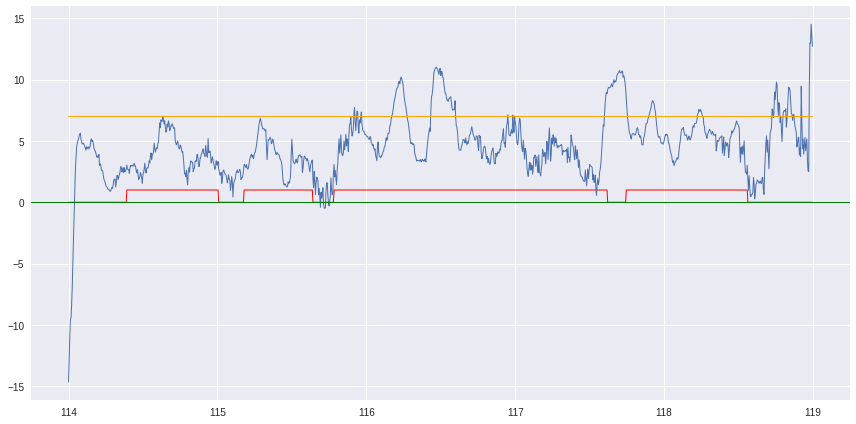

In [16]:
mask = (rat_up2.session_id == 7) & (rat_up2.SRB_id == 1)
temp = rat_up2[mask]

g = sns.FacetGrid(data=temp, size=6, aspect=2, hue='SRB_id')
g.map(plt.plot, "Time", "SRBall2" , alpha=1, linewidth=1, color='red');
g.map(plt.plot, "Time", "U"     , alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1, color="orange");
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

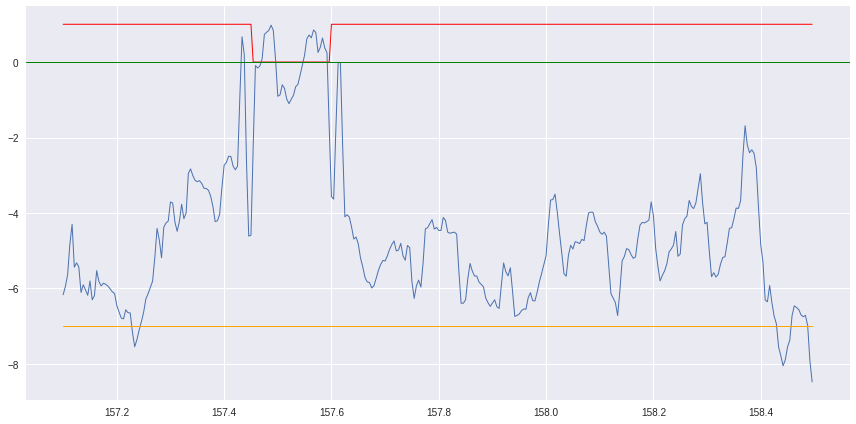

In [17]:
mask = (rat_up2.session_id == 7) & (rat_up2.SRB_id == 2)
temp = rat_up2[mask]

g = sns.FacetGrid(data=temp, size=6, aspect=2, hue='SRB_id')
g.map(plt.plot, "Time", "SRBall2" , alpha=1, linewidth=1, color='red');
g.map(plt.plot, "Time", "U"     , alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1, color="orange");
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

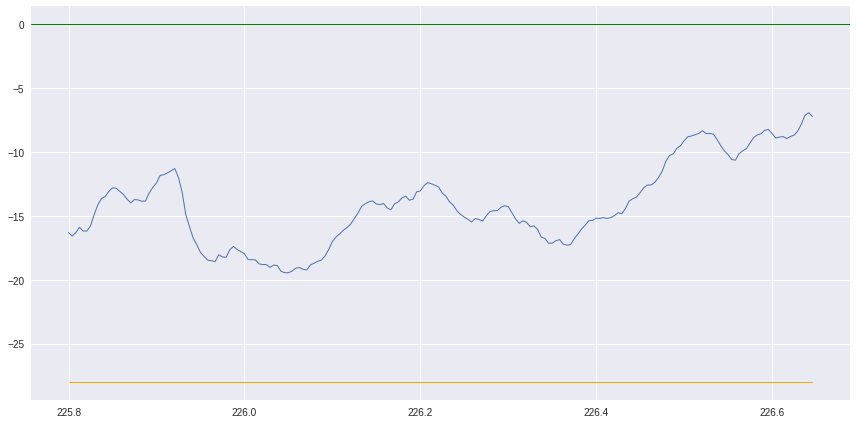

In [21]:
mask = (rat_up2.session_id == 7) & (rat_up2.SRB_id == 4)
temp = rat_up2[mask]

g = sns.FacetGrid(data=temp, size=6, aspect=2, hue='SRB_id')
g.map(plt.plot, "Time", "SRBall2" , alpha=1, linewidth=1, color='red');
g.map(plt.plot, "Time", "U"     , alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1, color="orange");
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

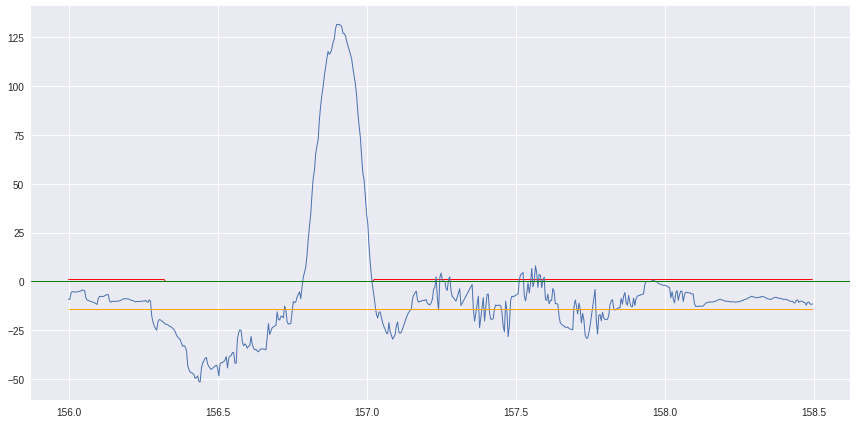

In [26]:
mask = (rat_up2.session_id == 0) & (rat_up2.SRB_id == 0)
temp = rat_up2[mask]

g = sns.FacetGrid(data=temp, size=6, aspect=2, hue='SRB_id')
g.map(plt.plot, "Time", "SRBall2" , alpha=1, linewidth=1, color='red');
g.map(plt.plot, "Time", "U"     , alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1, color="orange");
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

## Statistical evaluation

In [29]:
rat_up2.head()

,Frame,Time,X_Pos,Y_Pos,Z_Pos,X_Ori,Y_Ori,Z_Ori,session_id,Theta,...,SRB_id,Dmin,Dmax,SRB,SRBall,SRBtt,dtimeA,dtime,SRBall2,SRBtt2
0,37440,156.000010,0.093441,0.165644,-0.054762,0.879993,0.424692,-0.212234,0,103.559478,...,0,-21.5,-6.0,True,True,False,0.000000,0.0,True,False
1,37441,156.004177,0.093453,0.165645,-0.054730,0.880194,0.424575,-0.211656,0,103.520946,...,0,-21.5,-6.0,True,True,False,0.004167,0.0,True,False
2,37442,156.008343,0.093482,0.165663,-0.054691,0.880144,0.424881,-0.211242,0,103.496176,...,0,-21.5,-6.0,False,True,True,0.000000,0.0,True,False
3,37443,156.012510,0.093516,0.165688,-0.054651,0.880004,0.425362,-0.210859,0,103.474713,...,0,-21.5,-6.0,False,True,True,0.000000,0.0,True,False
4,37444,156.016677,0.093554,0.165714,-0.054609,0.879837,0.425904,-0.210461,0,103.452648,...,0,-21.5,-6.0,False,True,True,0.000000,0.0,True,False


## Distribution of Velocities in SRB

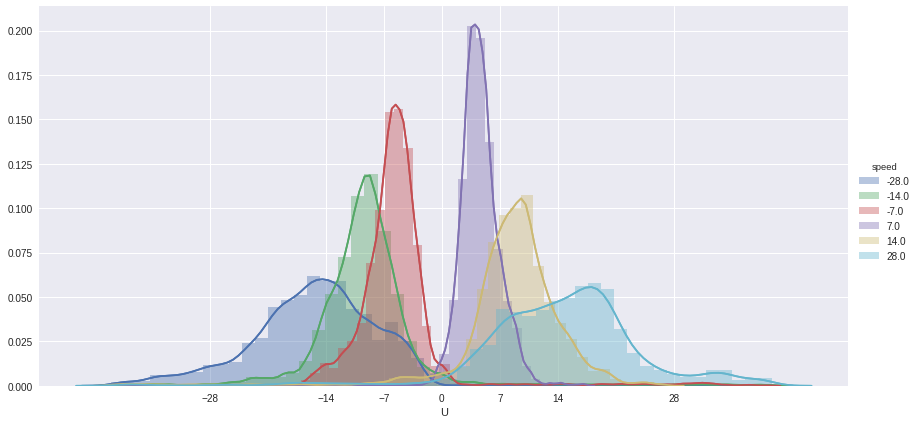

In [44]:
mask_srb = np.abs(rat_up2.U) < 40
srb = rat_up2[mask_srb]
g = sns.FacetGrid(data=srb, size=6, aspect=2, hue='speed');
g.set(xticks=[-28, -14, -7, 0, 7, 14, 28])
g.map(sns.distplot, 'U');
g.map(sns.kdeplot, 'U').add_legend()

## Distribition of velocities for each session

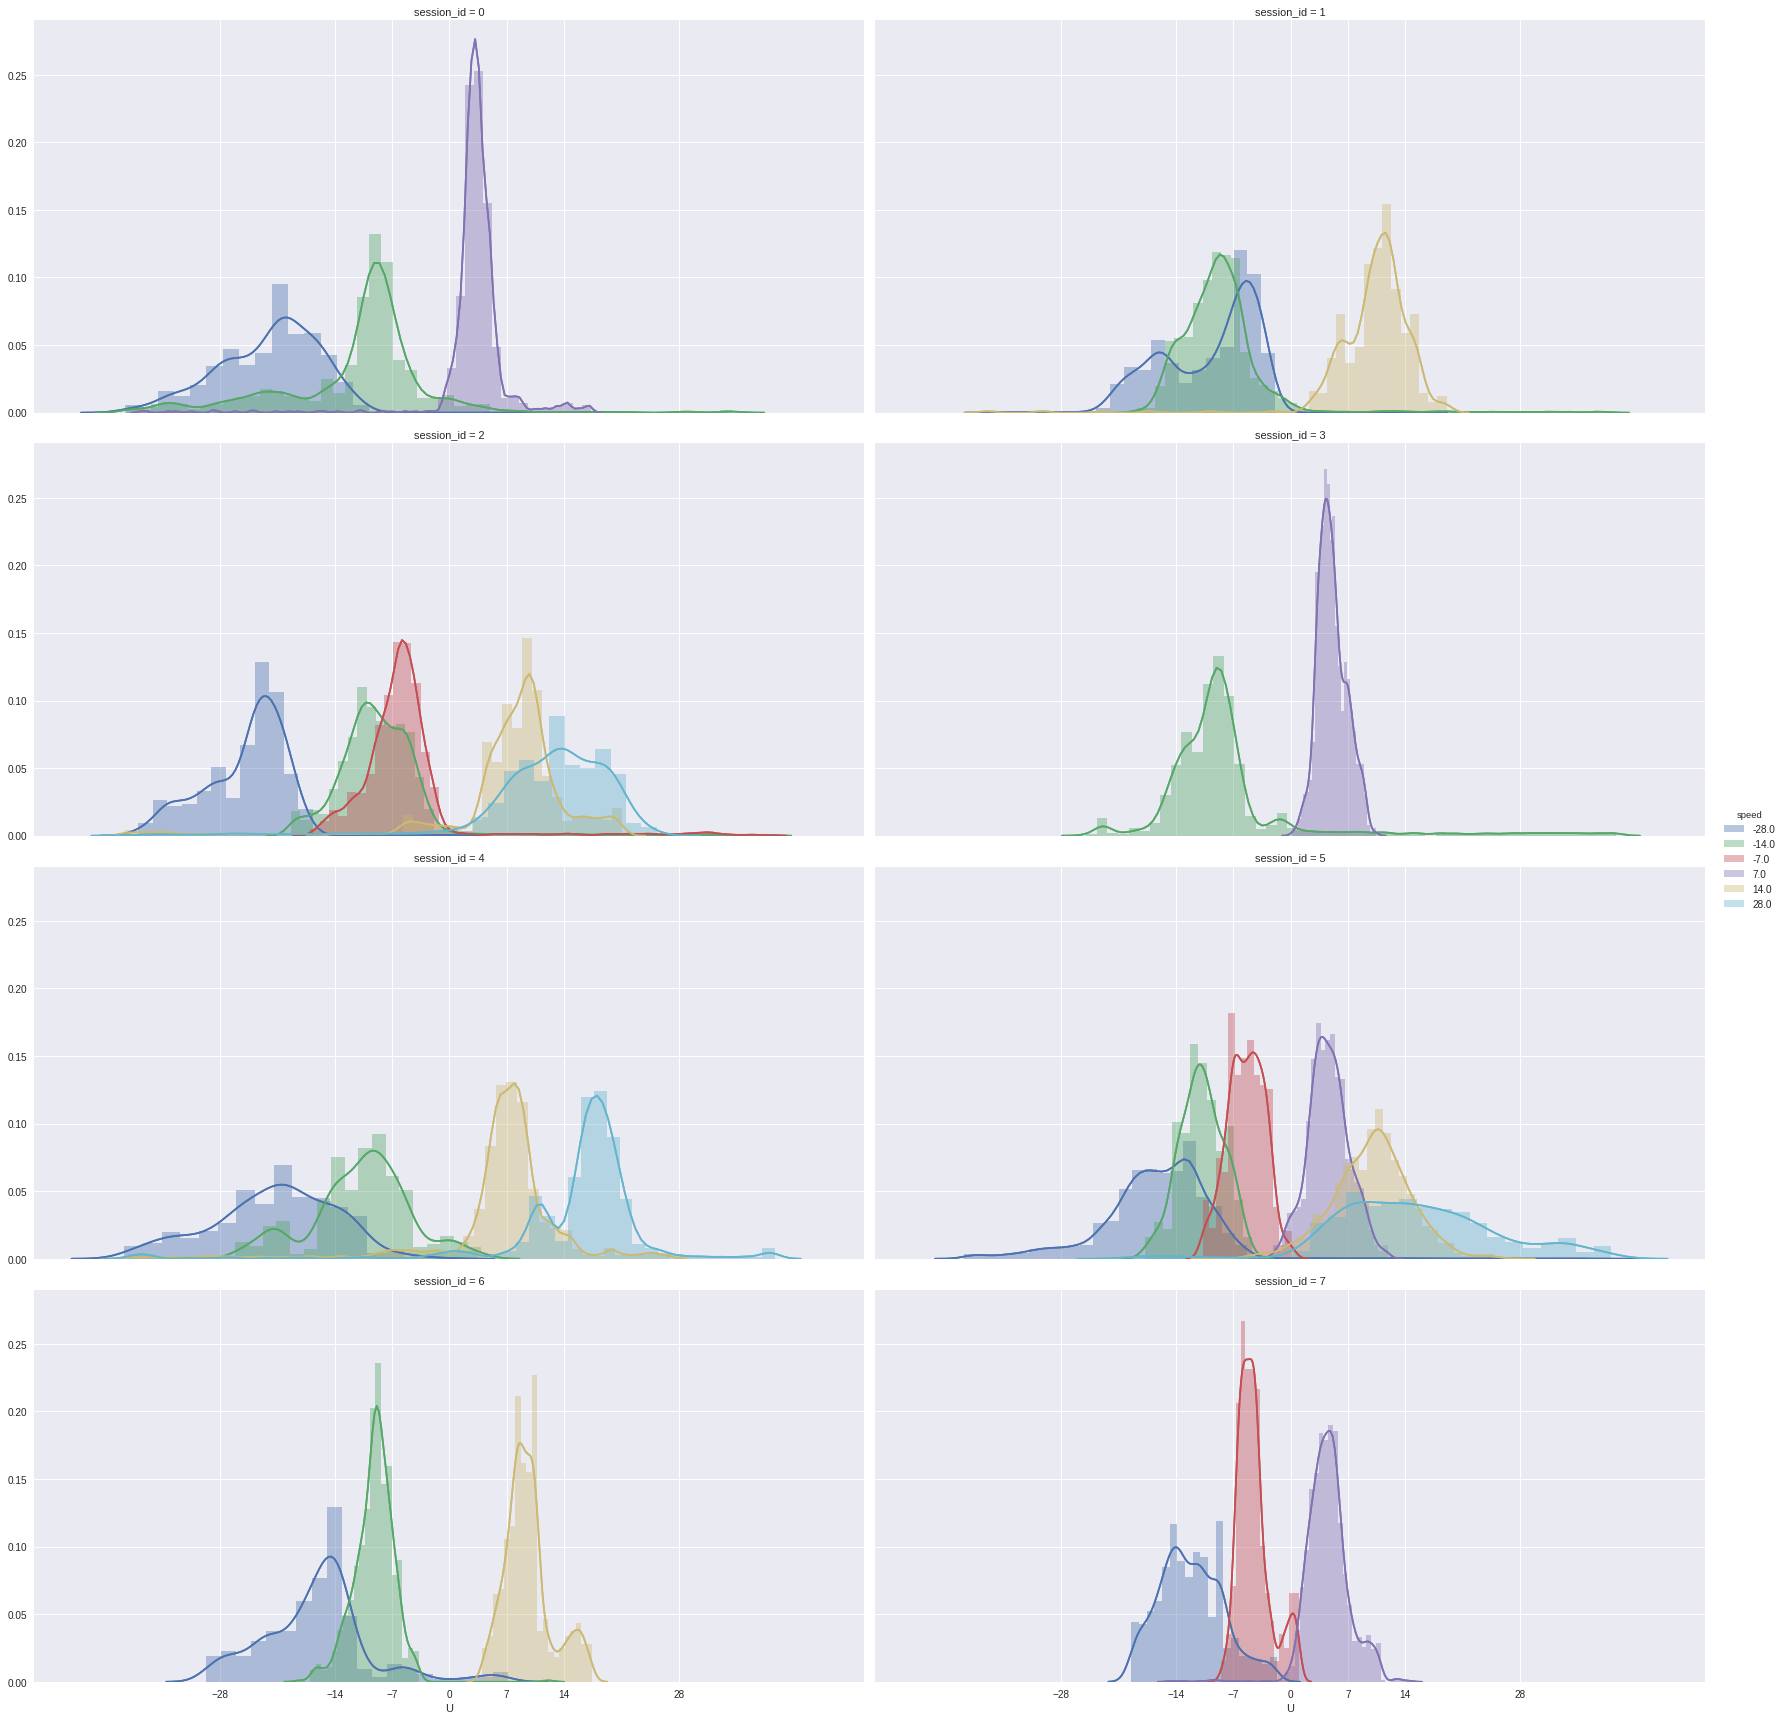

In [47]:
mask_srb = np.abs(rat_up2.U) < 40
srb = rat_up2[mask_srb]

g = sns.FacetGrid(data=srb, size=6, aspect=2, hue='speed', col='session_id', col_wrap=2);
g.map(sns.distplot, 'U');
g.set(xticks=[-28, -14, -7, 0, 7, 14, 28])
g.map(sns.kdeplot, 'U').add_legend()

## Checking SRBall2 with other 

In [49]:
l_all = len(rat_up2)
l_all

31342

In [51]:
mask_srball = (rat_up2.SRBall2 == True)
l_SRBall = len(rat_up2[mask_srball])
l_SRBall

17992